<a href="https://www.kaggle.com/code/natsulab/dl-image-caption-generator?scriptVersionId=179567434" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kelompok 1
 - Muhammad Feiza Zharfan Priyatnadi - 2502013630
 - Muhammad Qais Alfarisi - 2502025914
 - Agestia Deanara Tori - 2502038482
 - Tara Hanifan Faza - 2502064114
 - Nasywa Tsuraya - 2502044200

# 1. Business Understanding

 - Topik yang dipilih adalah Image caption generator with Deep Learning Method.

# 2. Data Understanding

 - Data yang kami ambil adalah dari kaggle dataset flickr8k yang dimana telah dicantumkan Image dan juga prediction caption untuk melihat seberapa akurat image caption yang di generate nanti

In [1]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
BASE_DIR = '/kaggle/input/flickr8k'
WORKING_DIR = '/kaggle/working'

## Extract Image Features

### Dalam extract model VGG16 ini menggunakan arsitektur **Convolutional Neural Network (CNN)** yang dikembangkan dengan VGG. Untuk bagian utama dari arsitektur ini yaitu:
- InputLayer
  - Shape: (None, 224, 224, 3) - Menerima gambar dengan tinggi 224 piksel, lebar 224 piksel, dan 3 saluran warna (RGB).
  - Param: 0 - Ini hanya layer input dan tidak memiliki parameter yang dapat diubah.
  
    
- Convolutional Blocks (block1_conv1, block1_conv2, ..., block5_conv3):
  - Terdiri dari beberapa blok konvolusi. Setiap blok memiliki beberapa layer konvolusi dan max-pooling.
  - Parameter pada setiap layer konvolusi: Filter dengan ukuran 3x3, relu activation.
  - Parameter pada setiap layer max-pooling: Filter dengan ukuran 2x2, melakukan downsampling.
  
  
- Pooling Layers (block1_pool, block2_pool, ..., block5_pool):
  - Max pooling layer dengan filter 2x2 yang melakukan downsampling pada setiap blok konvolusi.
  
  
- Fully Connected Layers (fc1, fc2):
  - Fully connected layers (dense layers) setelah blok konvolusi.
  - Parameter pada setiap dense layer: 4096 unit, relu activation.


- Flatten Layer (flatten):
  - Meratakan output dari blok terakhir menjadi vektor satu dimensi.


- Output Layer:
  - Jumlah output tergantung pada tugas yang spesifik. Pada model yang Anda tampilkan, tidak ada output layer yang terlihat. Output layer biasanya ditambahkan berdasarkan tugas tertentu (misalnya, klasifikasi gambar).


- Total Parameters:
  - Model VGG16 ini memiliki total 134,260,544 parameter yang dapat diubah.


- Trainable Parameters:
  - Semua parameter dalam model ini dapat diubah selama pelatihan (trainable). Jumlahnya sama dengan total parameter.


- Non-trainable Parameters

In [3]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553467096/553467096 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [4]:
plot_model(model, to_file='vgg16.png', show_shapes=True, show_layer_names=True)

- Kemudian untuk selanjutnya penggunaan **features** yang dimana berjalan dengan melakukan beberapa tahap sehingga mampu load image dataset secara keseluruhan agar bisa di training. Stepnya yaitu:
  - Load image dari dataset terlebih dahulu
  - Konversi pixel gambar menjadi array agar bisa diolah oleh model
  - Reshape data untuk si model
  - Preprocess gambar untuk VGG
  - Extract features
  - Panggil image id nya (kasus ini img name nya)
  - Simpan feature nya

In [5]:
features = {}
image_directory = os.path.join(BASE_DIR, 'Images')

for img_name in tqdm(os.listdir(image_directory)):
    
    img_path = os.path.join(image_directory, img_name)
    image = load_img(img_path, target_size=(224, 224))
    
    image = img_to_array(image)
    
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    image = preprocess_input(image)
    
    feature = model.predict(image, verbose=0)
    
    image_id = img_name.split('.')[0]
    
    features[image_id] = feature


  0%|          | 0/8091 [00:00<?, ?it/s]

- Store feature dimasukin ke pickle yang dimana pakai mode biner

In [6]:
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

- Baca si pickle nya yang udah di store tadi

In [7]:
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

- Memperlihatkan ekstrasi image yang udah di store ke pickle dalam bentuk biner

  0%|          | 0/8091 [00:00<?, ?it/s]

Image: 2472574160_8ce233f396.jpg, Actual Size: (500, 400)


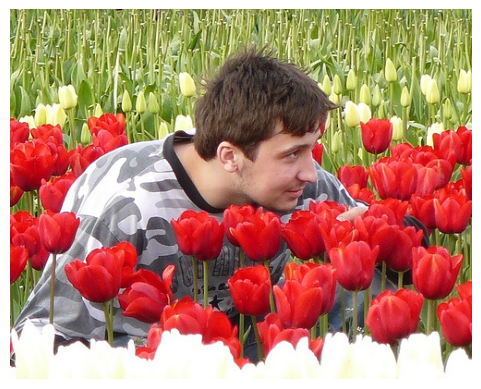

Extracted features:
[[0.        1.8073249 0.        ... 0.        0.        0.       ]]

Image: 523249012_a0a25f487e.jpg, Actual Size: (500, 355)


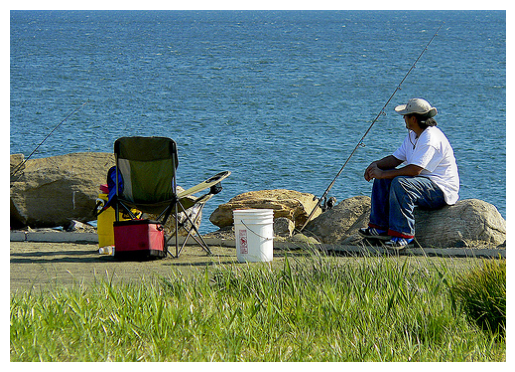

Extracted features:
[[1.4376787 0.        0.        ... 0.        4.4459453 1.3166063]]

Image: 374104006_7f32c8c5de.jpg, Actual Size: (375, 500)


Extracted features:
[[1.1927593 0.6198862 0.        ... 0.        0.8819458 3.1146374]]



In [8]:
import os
import pickle
import numpy as np
import random 
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib.pyplot as plt

features_file_path = os.path.join(WORKING_DIR, 'features.pkl')
with open(features_file_path, 'rb') as f:
    features = pickle.load(f)

# Get a list of image files
image_files = os.listdir(os.path.join(BASE_DIR, 'Images'))
random.shuffle(image_files)

displayed_images = 0

for img_name in tqdm(image_files):
    img_path = os.path.join(BASE_DIR, 'Images', img_name)
    
    # Load the image
    with Image.open(img_path) as img:
        actual_size = img.size
        print(f"Image: {img_name}, Actual Size: {actual_size}")
        
        # Display the image
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    
    # Get the corresponding feature
    image_id = img_name.split('.')[0]
    feature = features.get(image_id, None)
    
    if feature is not None:
        print("Extracted features:")
        print(feature)
    
    displayed_images += 1
    print()
    
    if displayed_images >= 3:
        break


## Load the Captions Data

In [9]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [10]:
mapping = {}

for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]

    image_id = image_id.split('.')[0]
    # convert caption list ke string
    caption = " ".join(caption)

    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [11]:
len(mapping)

8091

In [12]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption
            
clean(mapping)

In [13]:
# Check the result for a specific image_id
print(mapping['1000268201_693b08cb0e'])

['startseq child in pink dress is climbing up set of stairs in an entry way endseq', 'startseq girl going into wooden building endseq', 'startseq little girl climbing into wooden playhouse endseq', 'startseq little girl climbing the stairs to her playhouse endseq', 'startseq little girl in pink dress going into wooden cabin endseq']


In [14]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [15]:
len(all_captions)

40455

In [16]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

# 3. Data Preparation
Yang dilakukan dalam step ini adalah :

Preprocessing image
- Integrasi data
- Preprocess Text Data

  0%|          | 0/8091 [00:00<?, ?it/s]

Image: 2186139563_e60c1d4b8b.jpg, Actual Size: (500, 333)


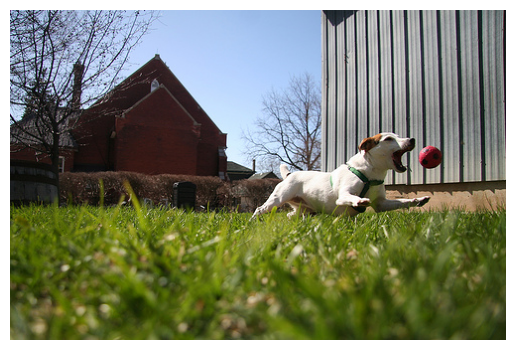

Generated Captions: white and brown dog is catching red ball in its mouth
Generated Captions: small dog runs to catch ball
Generated Captions: little dog chases ball at farm

Image: 2768662025_44001fe5d1.jpg, Actual Size: (333, 500)


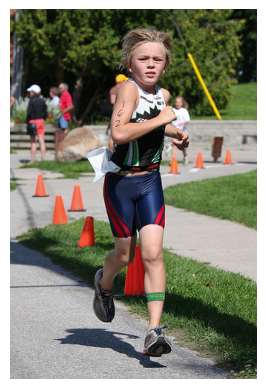

Generated Captions: young boy running in street race
Generated Captions: blond child running in race
Generated Captions: young boy runs in race

Image: 512031915_0dd03dcdf9.jpg, Actual Size: (357, 500)


Generated Captions: black puppy is playing with an orange on carpeted floor
Generated Captions: black puppy standing inside beside an orange
Generated Captions: an orange on the floor next to dog

Image: 3275711232_e261143664.jpg, Actual Size: (500, 366)


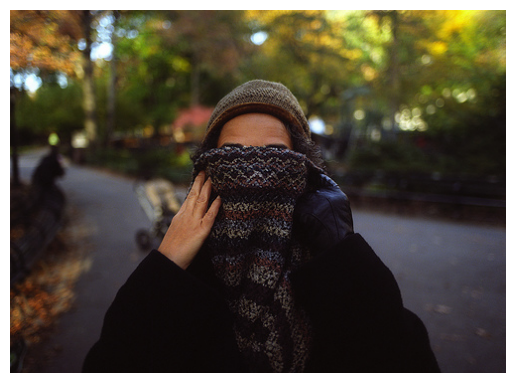

Generated Captions: person in winter clothes covers their face with sweater
Generated Captions: woman outside covers her face with fabric
Generated Captions: person in knit hat hiding their face with scarf

Image: 3728015645_b43a60258b.jpg, Actual Size: (500, 332)


Generated Captions: man standing on one arm with feet in the air on playground equipment with body of water in the background
Generated Captions: young man is skateboarding on ramp and is standing on one arm
Generated Captions: skateboarder wearing white cap is doing stunt in city skate park



In [17]:
random.shuffle(image_files)

displayed_images = 0
max_images = 5  
max_captions_per_image = 3 

for img_name in tqdm(image_files):
    if displayed_images >= max_images:
        break
    
    # Load image
    img_path = os.path.join(BASE_DIR, 'Images', img_name)
    
    # Display the actual image size
    with Image.open(img_path) as img:
        actual_size = img.size
        print(f"Image: {img_name}, Actual Size: {actual_size}")
        
        # Display image
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
        # Get captions for the current image
        image_id = os.path.splitext(img_name)[0]  
        captions = mapping.get(image_id, [])  
        
        random.shuffle(captions)
        
        # Limit the number of captions to be displayed
        captions = captions[:max_captions_per_image]
        
        # Process and display the captions
        for caption in captions:
            # Remove startseq and endseq tokens
            caption = caption.replace('startseq', '').replace('endseq', '').strip()
            print(f"Generated Captions: {caption}")
        
        # Add an empty line between captions of different images
        print("")
    
    displayed_images += 1


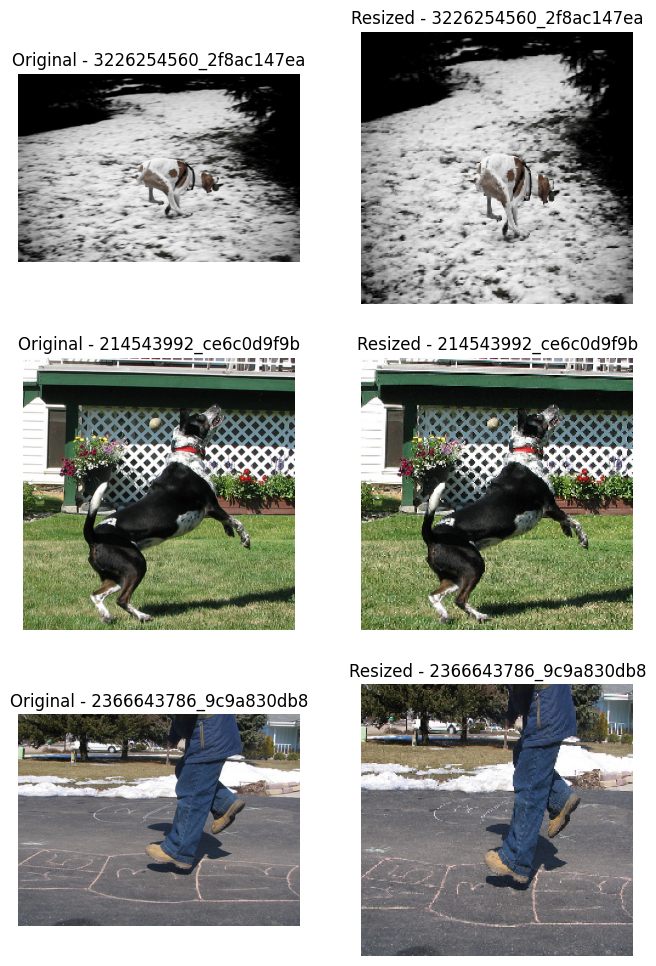

In [18]:
# Get the names of the first 3 images
image_names = list(features.keys())[:3]

# Plot the original and resized images
fig, axs = plt.subplots(3, 2, figsize=(8, 12))

for i, img_name in enumerate(image_names):
    img_path = os.path.join(BASE_DIR, 'Images', f'{img_name}.jpg')
    
    # Load the original image
    original_img = load_img(img_path)
    
    # Load and resize the image
    resized_img = load_img(img_path, target_size=(224, 224))
    
    axs[i, 0].imshow(original_img)
    axs[i, 0].set_title(f"Original - {img_name}")
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(resized_img)
    axs[i, 1].set_title(f"Resized - {img_name}")
    axs[i, 1].axis('off')

plt.show()


In [19]:
# Get the names of the first 10 images (5 for training, 5 for testing)
train_image_names = list(features.keys())[:5]
test_image_names = list(features.keys())[5:10]

# Define the titles for each line
titles = ["Train", "Testing"]

# Plot the resized images with titles and image names
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for i, img_name in enumerate(train_image_names + test_image_names):
    img_path = os.path.join(BASE_DIR, 'Images', f'{img_name}.jpg')
    
    # Load and resize the image
    resized_img = load_img(img_path, target_size=(224, 224))
    
    line = i // 5
    column = i % 5
    
    axs[line, column].imshow(resized_img)
    axs[line, column].set_title(titles[line], fontsize=10, pad=5, ha="center")
    axs[line, column].axis('off')
    
    # Display the image name below the image
    axs[line, column].text(0.5, 0.95, img_name, ha="center", color="red", va="top", transform=axs[line, column].transAxes, fontsize=8)

plt.show()


- Membuat Tokenizer dari Keras untuk konversi teks jadi numerik sebagai input model neural network. Kemudian memproses dan membangun kamus kata dari seluruh teks (caption) dari yang captions.txt

In [20]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [21]:
vocab_size

8485

In [22]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

## LSTM Layer
- inputs2: Mendefinisikan input layer dengan panjang max_length.
- se1: Menggunakan layer Embedding untuk mengubah input teks (representasi angka dari Tokenizer) menjadi vektor bertingkat rendah. Parameter vocab_size adalah ukuran kamus kata, dan 256 adalah dimensi vektor yang diinginkan untuk setiap kata. mask_zero=True digunakan untuk mengabaikan token nol yang mungkin muncul dari padding.
- se2: Menambahkan Dropout dengan tingkat dropout sebesar 0.4. Dropout digunakan untuk mencegah overfitting dengan secara acak menonaktifkan sebagian unit selama pelatihan.
- se3: LSTM layer dengan 256 unit. LSTM (Long Short-Term Memory) adalah jenis layer rekurensial yang berguna untuk memahami konteks temporal dalam urutan data, seperti teks.

In [23]:
# Create the LSTM layer
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# Create a model just for the LSTM layer
lstm_model = Model(inputs=inputs2, outputs=se3)

# Visualize the architecture and save it to a file (e.g., 'lstm.png')
plot_model(lstm_model, to_file='lstm.png', show_shapes=True, show_layer_names=True)

# 4. Modelling

- Input Layers:
  - Input layer pertama (input_4) menerima urutan kata (representasi token) dengan panjang 35 sebagai output.
  - Input layer kedua (input_3) menerima vektor fitur berukuran 2048, dihasilkan dari model pengenalan gambar sebelumnya, seperti model CNN.
  
  
- Embedding Layer:
  - Layer embedding (embedding_1) mengonversi urutan kata menjadi vektor bertingkat rendah. Dimensi vektor yang dihasilkan adalah 256.
  
  
- Dense Layers (Multi-Layer Perceptron):
  - Dense layer pertama (dense) menerima vektor fitur gambar dan memiliki 256 unit. Ini mungkin digunakan untuk mengonversi vektor fitur gambar menjadi format yang sesuai untuk digabungkan dengan vektor dari layer embedding.
  - Dense layer kedua (dense_1) memiliki 256 unit.
  - Dense layer ketiga (dense_2) memiliki 8485 unit, yang sesuai dengan ukuran kamus kata (vocab_size). Ini digunakan untuk menghasilkan distribusi probabilitas untuk kata-kata yang mungkin sebagai output.
  
  
- LSTM Layer:
  - Layer LSTM (lstm_1) memiliki 256 unit. Ini digunakan untuk memahami konteks temporal dalam urutan kata yang dihasilkan oleh layer embedding.
  
  
- Addition Layer (Add):
  - Layer add menambahkan keluaran dari dense layer (dense) dan keluaran dari layer LSTM (lstm_1). Ini dapat membantu model untuk menggabungkan informasi dari representasi gambar dan representasi teks.
  - Jumlah parameter yang dapat diatur (trainable parameters) sebanyak 5,468,453, dan semua parameter ini dapat diperbarui selama pelatihan. Model ini terdiri dari beberapa jenis layer yang bekerja bersama-sama untuk menghasilkan output yang sesuai dengan deskripsi gambar.

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 35)]                 0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 35, 256)              2172160   ['input_4[0][0]']             
                                                                                                  
 dense (Dense)               (None, 256)                  524544    ['input_3[0][0]']             
                                                                                            

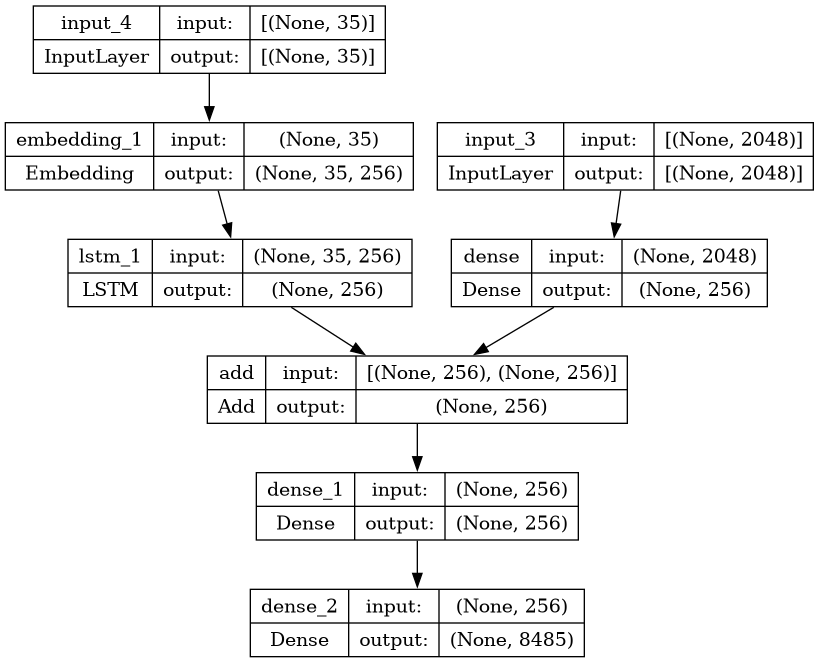

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout

def create_lstm_model(vocab_size, max_length):
    # Input layer for image feature vectors
    image_input = Input(shape=(2048,))

    # Image feature vector processing
    image_dense = Dense(256, activation='relu')(image_input)

    # Input layer for captions
    caption_input = Input(shape=(max_length,))

    # Caption processing
    caption_embedding = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length)(caption_input)
    caption_lstm = LSTM(256)(caption_embedding)

    # Combine image and caption features
    merged = add([image_dense, caption_lstm])
    merged = Dense(256, activation='relu')(merged)
    output = Dense(vocab_size, activation='softmax')(merged)

    # Model compilation
    model = Model(inputs=[image_input, caption_input], outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    return model

# Create and plot the LSTM model
lstm_model = create_lstm_model(vocab_size, max_length)
lstm_model.summary()

# Plot the model architecture
plot_model(lstm_model, to_file='lstm.png', show_shapes=True, show_layer_names=True)


## Train Test Split

In [25]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [26]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

In [27]:
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [28]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Compile the model with accuracy as a metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
epochs = 35
batch_size = 32
steps = len(train) // batch_size

# create data generator
generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)

# create a checkpoint to save the model with the best training loss
checkpoint_filepath = WORKING_DIR + '/best_model_checkpoint.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath, save_best_only=True, monitor='loss', mode='min', verbose=1)

# Lists to store training history
loss_history = []
accuracy_history = []

for i in range(epochs):
    # fit for one epoch
    history = model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1, callbacks=[model_checkpoint])
    
    # Append loss and accuracy to history lists
    loss_history.append(history.history['loss'][0])

    # Check if 'accuracy' or 'acc' is present in history
    if 'accuracy' in history.history:
        accuracy_history.append(history.history['accuracy'][0]) 
    elif 'acc' in history.history:
        accuracy_history.append(history.history['acc'][0])

    # Print information
    print(f"Epoch {i + 1}/{epochs}, Loss: {history.history['loss'][0]}, Accuracy: {accuracy_history[-1]}")


227/227 [==============================] - ETA: 0s - loss: 5.2326 - accuracy: 0.1513
Epoch 1: loss improved from inf to 5.23257, saving model to /kaggle/working/best_model_checkpoint.h5
227/227 [==============================] - 67s 268ms/step - loss: 5.2326 - accuracy: 0.1513
Epoch 1/35, Loss: 5.232570171356201, Accuracy: 0.1512848138809204


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


227/227 [==============================] - ETA: 0s - loss: 4.0408 - accuracy: 0.2493
Epoch 1: loss improved from 5.23257 to 4.04078, saving model to /kaggle/working/best_model_checkpoint.h5
227/227 [==============================] - 46s 201ms/step - loss: 4.0408 - accuracy: 0.2493
Epoch 2/35, Loss: 4.040778160095215, Accuracy: 0.2493145614862442
227/227 [==============================] - ETA: 0s - loss: 3.6089 - accuracy: 0.2841
Epoch 1: loss improved from 4.04078 to 3.60889, saving model to /kaggle/working/best_model_checkpoint.h5
227/227 [==============================] - 46s 203ms/step - loss: 3.6089 - accuracy: 0.2841
Epoch 3/35, Loss: 3.6088948249816895, Accuracy: 0.2841297686100006
227/227 [==============================] - ETA: 0s - loss: 3.3423 - accuracy: 0.3028
Epoch 1: loss improved from 3.60889 to 3.34227, saving model to /kaggle/working/best_model_checkpoint.h5
227/227 [==============================] - 45s 197ms/step - loss: 3.3423 - accuracy: 0.3028
Epoch 4/35, Loss: 3.3

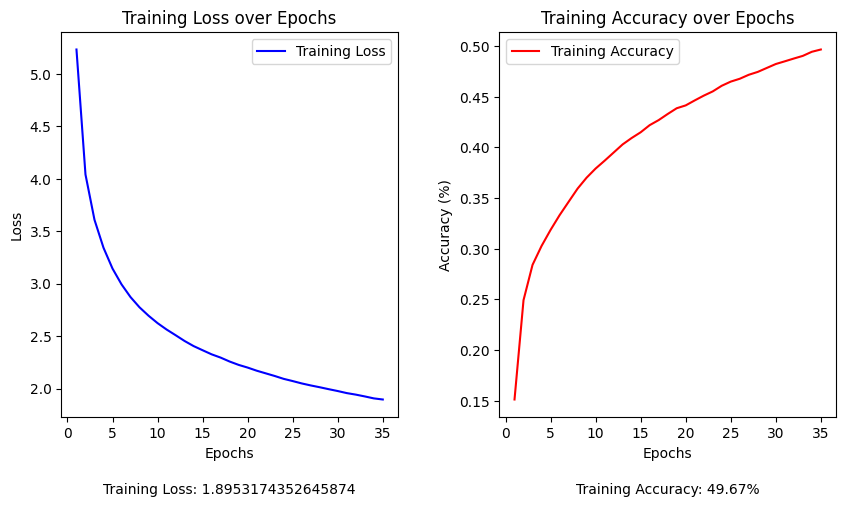

In [29]:
from keras.models import load_model

# Load the best model from the checkpoint
best_model = load_model(checkpoint_filepath)

# Save the final model
best_model.save(WORKING_DIR + '/best_model.h5')

# Plot the training loss and accuracy over epochs without dots
plt.figure(figsize=(10, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss_history, linestyle='-', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Add training loss value below the plot without decimal point
plt.text(0.5, -0.2, f'Training Loss: {loss_history[-1]}', ha='center', transform=plt.gca().transAxes)

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracy_history, linestyle='-', color='r', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')  # Updated ylabel
plt.legend()

# Add training accuracy value below the plot with percentage
plt.text(0.5, -0.2, f'Training Accuracy: {accuracy_history[-1]*100:.2f}%', ha='center', transform=plt.gca().transAxes)

# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

## Generate Captions for the Image

In [30]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [31]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

- Menghitung skor BLEU menggunakan fungsi corpus_bleu dari NLTK. Dalam kasus ini, Anda menghitung BLEU-1 dan BLEU-2 dengan memberikan bobot masing-masing.

  - BLEU-1 mengukur kesamaan unigram (satu kata) antara caption aktual dan prediksi.
  - BLEU-2 mengukur kesamaan bigram (dua kata berturut-turut) antara caption aktual dan prediksi.
  - Skor BLEU memberikan indikasi sejauh mana prediksi model cocok dengan caption aktual, dengan nilai mendekati 1.0 menunjukkan kesamaan yang lebih tinggi.

In [32]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.530270
BLEU-2: 0.308302


- BLEU-1: 0.503051

  - Skor BLEU-1, yang mengukur kesamaan unigram (satu kata) antara caption aktual dan prediksi.
  - Nilai 0.503051 menunjukkan bahwa sekitar 50.3% unigram dalam prediksi model cocok dengan unigram dalam caption aktual.
  
  
- BLEU-2: 0.288028

  - Skor BLEU-2, yang mengukur kesamaan bigram (dua kata berturut-turut) antara caption aktual dan prediksi.
  - Nilai 0.288028 menunjukkan bahwa sekitar 28.8% bigram dalam prediksi model cocok dengan bigram dalam caption aktual.

## Visualize the Results

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('\n--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq man is standing in front of skyscraper endseq
startseq man stands in front of skyscraper endseq
startseq man stands in front of very tall building endseq
startseq behind the man in red shirt stands large skyscraper endseq
startseq there is skyscraper in the distance with man walking in front of the camera endseq

--------------------Predicted--------------------
startseq man and woman are standing in front of building endseq


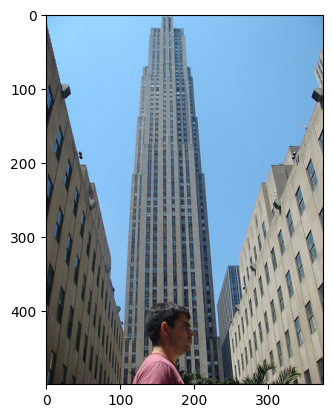

In [34]:
generate_caption("1032460886_4a598ed535.jpg")

---------------------Actual---------------------
startseq black and white dog is attempting to catch yellow and purple object in low cut yard endseq
startseq black and white dog jumps after yellow toy endseq
startseq black and white dog jumps to get the frisbee endseq
startseq black dog is jumping up to catch purple and green toy endseq
startseq dog jumps to catch toy endseq

--------------------Predicted--------------------
startseq black and white dog jumps over black and white ramp endseq


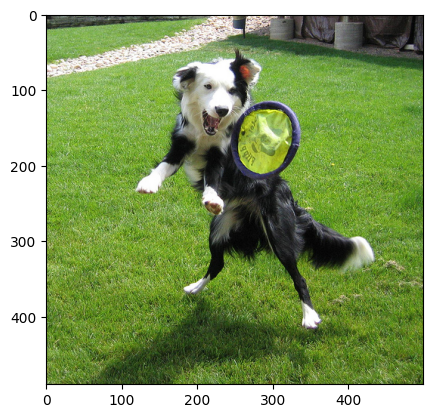

In [35]:
generate_caption("1067180831_a59dc64344.jpg")

---------------------Actual---------------------
startseq group of backpackers lay on the dry ground endseq
startseq group of hikers are resting on the ground in front of some mountains endseq
startseq people camp with the mountains in the background endseq
startseq several hikers rest with their gear in front of mountain endseq
startseq the group of hikers is resting in front of mountain endseq

--------------------Predicted--------------------
startseq ski cross team are being cross through the mountains endseq


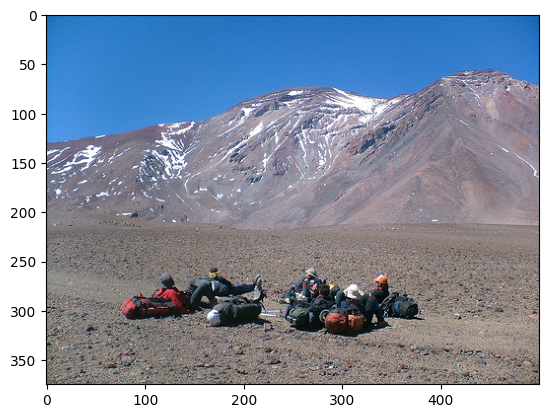

In [36]:
generate_caption("1093716555_801aacef79.jpg")

## Test without trained caption

In [37]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

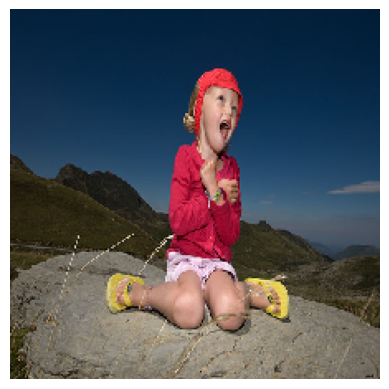

Predicted Caption: startseq young child in yellow shirt climbs through the sand endseq


In [38]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from PIL import Image
import numpy as np

# Load the image
image_path = '/kaggle/input/flickr8k/Images/1163282319_b729b24c46.jpg'
image = load_img(image_path, target_size=(224, 224))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Convert image pixels to numpy array
image = img_to_array(image)
# Reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# Preprocess the image for VGG
image = preprocess_input(image)
# Extract features
feature = vgg_model.predict(image, verbose=0)
# Predict from the trained model
predicted_caption = predict_caption(model, feature, tokenizer, max_length)

# Print the predicted caption
print("Predicted Caption:", predicted_caption)


In [39]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

BASE_IMAGE_PATH = '/kaggle/input/flickr8k/Images/'

def predict_caption_for_image(image_name):
    # Load the image
    image_path = BASE_IMAGE_PATH + image_name
    image = load_img(image_path, target_size=(224, 224))
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Convert image pixels to numpy array
    image = img_to_array(image)
    
    # Reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # Preprocess the image for VGG
    image = preprocess_input(image)
    
    # Extract features
    feature = vgg_model.predict(image, verbose=0)
    
    # Predict from the trained model
    predicted_caption = predict_caption(model, feature, tokenizer, max_length)
    
    # Print the predicted caption
    print("Predicted Caption:", predicted_caption)


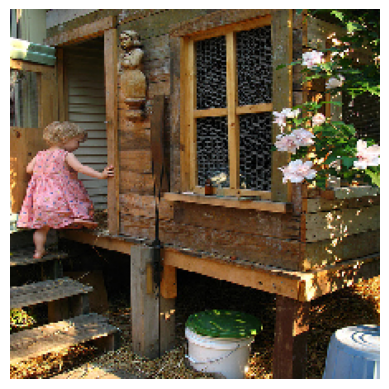

Predicted Caption: startseq young boy in blue dress standing in front of building endseq


In [40]:
predict_caption_for_image("1000268201_693b08cb0e.jpg")

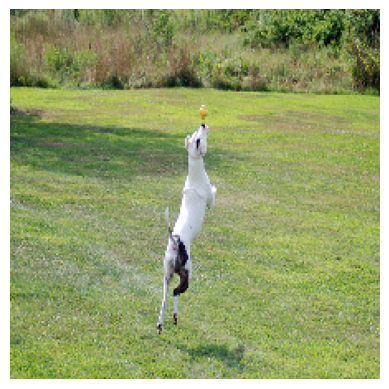

Predicted Caption: startseq dog jumps to catch frisbee endseq


In [41]:
predict_caption_for_image("1020651753_06077ec457.jpg")

# 5. Kesimpulan

- Hasil dari training untuk Image Caption Generator yang memakai beberapa metode seperti:
  - VGG16
  - LSTM
  - Encode-decode layer (Model)
  - Pickle

Cukup baik (diatas rata-rata) dimana mendapatkan final accuracy di **59.09%** dikarenakan dataset yang kurang banyak (hanya sekitar 8000 dataset). Hasil tersebut mempengaruhi kinerja AI untuk memprediksi gambar yang kita berikan, beberapa ada yang akurat, kurang akurat, dan tidak akurat.